In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import decomposition

fueldata = pd.read_csv('dataforMVA_strategicPWR_fin_New_Erik_v2.csv', header = 0, index_col = 0)
fueldata = fueldata.drop(columns = ['cherenkovnobeta'])
fueldata.head()

,BU,CT,IE,fuelType,reactorType,Ce141,Nb95,Y91,Zr95,Ce144,Ru106,Cs134,Eu154,Cs137,Sr90,tau,cherenkov
0,15.0,0.00,1.5,UO2,PWR,1.644016e-06,1.663418e-06,1.978901e-06,3.129354e-06,0.000009,0.000006,0.000002,2.564201e-07,0.000023,0.000014,52.173,4.084451e+07
1,15.0,91.25,1.5,UO2,PWR,2.348185e-07,1.057525e-06,6.713499e-07,1.165161e-06,0.000007,0.000005,0.000001,2.513037e-07,0.000023,0.000014,52.065,3.455245e+07
2,15.0,182.50,1.5,UO2,PWR,3.353965e-08,4.656889e-07,2.277581e-07,4.338275e-07,0.000006,0.000004,0.000001,2.462893e-07,0.000022,0.000014,51.959,2.935679e+07
3,15.0,273.75,1.5,UO2,PWR,4.790544e-09,1.851796e-07,7.726784e-08,1.615281e-07,0.000005,0.000003,0.000001,2.413751e-07,0.000022,0.000014,51.854,2.505755e+07
4,15.0,365.00,1.5,UO2,PWR,6.842442e-10,7.088018e-08,2.621342e-08,6.014221e-08,0.000004,0.000003,0.000001,2.365588e-07,0.000022,0.000014,51.751,2.149216e+07


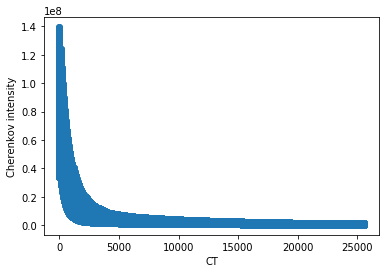

In [2]:
plt.scatter(fueldata.CT, fueldata.cherenkov)
plt.xlabel('CT')
plt.ylabel('Cherenkov intensity')
plt.show()

Split the full data set into a smaller selection for furhter analysis.
Also, select data based on criteria if desired, such as e.g. only selecting long-cooled fuel

In [3]:
subfueldata = fueldata[fueldata['CT']>0*365].sample(n= 1000, random_state=1)
subfueldata.head()

,BU,CT,IE,fuelType,reactorType,Ce141,Nb95,Y91,Zr95,Ce144,Ru106,Cs134,Eu154,Cs137,Sr90,tau,cherenkov
381189,26.5,18250.0,4.1,UO2,PWR,1.572844e-175,2.920528e-143,2.975051e-100,5.198528e-92,5.955059e-25,9.064248e-21,1.576944e-13,9.452148e-09,0.000012,0.000008,107.774,860285.139
267874,38.0,18250.0,3.3,UO2,PWR,1.522274e-175,2.715005e-143,2.471691e-100,4.832698e-92,5.872950e-25,1.435913e-20,3.105491e-13,1.813179e-08,0.000018,0.000010,91.025,1227538.368
133217,23.5,22265.0,2.4,UO2,PWR,9.669162e-213,7.171214e-178,5.414918e-121,6.152454e-111,3.083138e-29,6.123790e-24,3.798371e-15,3.644981e-09,0.000009,0.000005,69.465,583178.193
299965,49.5,16790.0,3.5,UO2,PWR,5.011323e-162,9.760264e-131,7.423988e-93,3.443168e-85,2.028977e-23,2.606627e-19,1.761793e-12,3.558133e-08,0.000025,0.000014,95.520,1758366.943
562082,51.0,13140.0,5.3,UO2,PWR,2.580257e-128,2.226927e-99,4.193040e-74,4.344068e-68,1.454977e-19,1.827591e-16,4.540567e-11,8.144250e-08,0.000032,0.000021,129.530,2388396.332


Text(0, 0.5, 'CT')

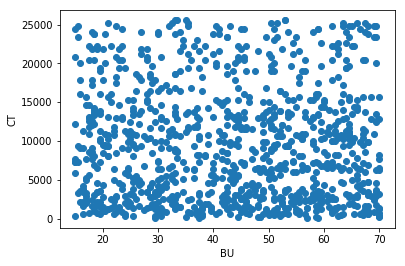

In [4]:
plt.scatter(subfueldata.BU, subfueldata.CT)
plt.xlabel('BU')
plt.ylabel('CT')

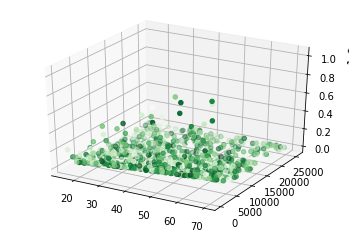

In [5]:
from mpl_toolkits.mplot3d import axes3d

#%matplotlib auto 
%matplotlib inline 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(subfueldata.BU, subfueldata.CT, subfueldata.cherenkov, c=subfueldata.IE, cmap='Greens')

In [6]:
features = ('Cs137','Sr90','tau','cherenkov')
X = subfueldata.loc[:,features].values
#?X

X = StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components = 4)
pca.fit(X)
Xt = pca.transform(X)


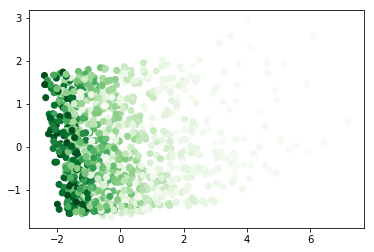

In [7]:
plt.scatter(Xt[:,0], Xt[:,1], c=subfueldata.CT, cmap='Greens')

Using matplotlib backend: Qt5Agg


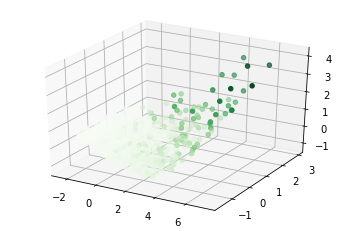

In [8]:
%matplotlib auto

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(Xt[:,0], Xt[:,1], Xt[:,2], c=subfueldata.cherenkov, cmap='Greens')

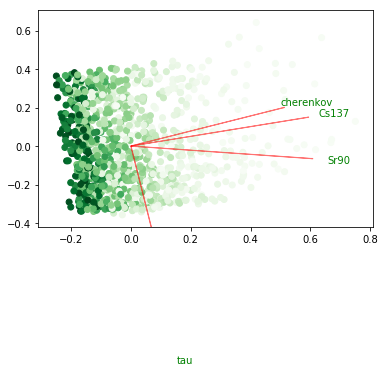

In [9]:
def pca_with_scoresPlot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,c=subfueldata.CT, cmap='Greens')#if more classes, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, features[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

%matplotlib inline
#Call the function. Use only the 2 PCs.
pca_with_scoresPlot(Xt[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()


Eigenvectors and loadings - part of PCA analysis

In [10]:
fueldata.corr()

,BU,CT,IE,Ce141,Nb95,Y91,Zr95,Ce144,Ru106,Cs134,Eu154,Cs137,Sr90,tau,cherenkov
BU,1.000000e+00,-2.199925e-18,-5.632152e-18,-0.001892,-0.008356,-0.016631,-0.007025,-0.000489,0.085821,0.211409,0.403954,0.650215,0.516976,0.001426,0.216790
CT,-2.199925e-18,1.000000e+00,1.213528e-20,-0.131630,-0.194505,-0.159826,-0.168264,-0.341147,-0.366940,-0.464805,-0.699169,-0.699487,-0.773514,-0.071493,-0.504797
IE,-5.632152e-18,1.213528e-20,1.000000e+00,0.001846,0.006677,0.013583,0.005736,0.011559,-0.046827,-0.031888,-0.012664,-0.005686,0.201123,0.993654,-0.024318
Ce141,-1.891736e-03,-1.316295e-01,1.846258e-03,1.000000,0.886441,0.967111,0.968824,0.667039,0.563931,0.380242,0.193114,0.115855,0.131266,0.019362,0.474383
Nb95,-8.356061e-03,-1.945054e-01,6.676980e-03,0.886441,1.000000,0.958507,0.973041,0.863295,0.737350,0.518780,0.273888,0.164607,0.189626,0.032284,0.632685
Y91,-1.663067e-02,-1.598260e-01,1.358264e-02,0.967111,0.958507,1.000000,0.993687,0.762524,0.616413,0.414917,0.212778,0.124931,0.149990,0.034696,0.525045
Zr95,-7.025187e-03,-1.682637e-01,5.736171e-03,0.968824,0.973041,0.993687,1.000000,0.789282,0.666631,0.459399,0.238464,0.142814,0.164442,0.027978,0.567486
Ce144,-4.894073e-04,-3.411473e-01,1.155906e-02,0.667039,0.863295,0.762524,0.789282,1.000000,0.927945,0.763198,0.472885,0.299494,0.340559,0.054619,0.854863
Ru106,8.582091e-02,-3.669402e-01,-4.682658e-02,0.563931,0.737350,0.616413,0.666631,0.927945,1.000000,0.910727,0.607118,0.410759,0.417487,-0.001250,0.952245
Cs134,2.114089e-01,-4.648046e-01,-3.188816e-02,0.380242,0.518780,0.414917,0.459399,0.763198,0.910727,1.000000,0.818507,0.610355,0.605538,0.022387,0.982024


In [11]:
halflife={'Y91':58.5,
          'Zr95':64,
          'Nb95':35,
          'Ru106':372,
          'Cs134':2.065*365,
          'Cs137':30.1*365,
          'Eu154':8.6*365,
          'Ce141':32.5,
          'Ce144':285,
          'Sr90':28.8*365
          }  

d2s=86400

for iso in halflife:
    subfueldata[iso+'A']=subfueldata[iso]*1e24*(np.log(2)/(halflife[iso]*d2s))
subfueldata.head()


,BU,CT,IE,fuelType,reactorType,Ce141,Nb95,Y91,Zr95,Ce144,...,Y91A,Zr95A,Nb95A,Ru106A,Cs134A,Cs137A,Eu154A,Ce141A,Ce144A,Sr90A
381189,26.5,18250.0,4.1,UO2,PWR,1.572844e-175,2.920528e-143,2.975051e-100,5.198528e-92,5.955059e-25,...,4.079907e-83,6.516466e-75,6.694297e-126,1.954792e-04,1678.475619,9.077915e+09,2.415744e+07,3.882522e-158,1.676305e-08,6.402629e+09
267874,38.0,18250.0,3.3,UO2,PWR,1.522274e-175,2.715005e-143,2.471691e-100,4.832698e-92,5.872950e-25,...,3.389612e-83,6.057890e-75,6.223207e-126,3.096684e-04,3305.438749,1.289436e+10,4.634055e+07,3.757693e-158,1.653191e-08,7.926666e+09
133217,23.5,22265.0,2.4,UO2,PWR,9.669162e-213,7.171214e-178,5.414918e-121,6.152454e-111,3.083138e-29,...,7.425876e-104,7.712233e-94,1.643752e-160,1.320654e-07,40.429301,6.288162e+09,9.315703e+06,2.386806e-195,8.678804e-13,3.899497e+09
299965,49.5,16790.0,3.5,UO2,PWR,5.011323e-162,9.760264e-131,7.423988e-93,3.443168e-85,2.028977e-23,...,1.018106e-75,4.316085e-68,2.237202e-113,5.621441e-03,18752.266309,1.819615e+10,9.093741e+07,1.237032e-144,5.711419e-07,1.063139e+10
562082,51.0,13140.0,5.3,UO2,PWR,2.580257e-128,2.226927e-99,4.193040e-74,4.344068e-68,1.454977e-19,...,5.750225e-57,5.445382e-51,5.104458e-82,3.941376e+00,483291.219107,2.344759e+10,2.081476e+08,6.369295e-111,4.095652e-03,1.570277e+10


Start of MVA machine learning step

In [12]:
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(subfueldata, random_state=0, test_size=0.2)

#traindf.head()

In [13]:
import random
import math

selectionAll=['Cs137A','Cs134A','Eu154A','Zr95A','Nb95A','Ru106A','Ce141A','Ce144A','Sr90A','tau','cherenkov']
print (random.normalvariate(1,0.05))

def applynoise(x):
    return x*random.normalvariate(1,0.05)

#traindf[selectionAll] = applynoise(traindf[selectionAll])
#testdf[selectionAll] = applynoise(testdf[selectionAll])
#traindf.head()

#traindf['cherenkov'] = traindf['cherenkov'].apply(lambda row: math.log(row))
#testdf['cherenkov'] = testdf['cherenkov'].apply(lambda row: math.log(row))
traindf['cherenkov'].head()

0.9800482340056423


512970    1104376.901
207017    4046096.117
525990    4601075.462
233033     461262.060
282252    2176120.136
Name: cherenkov, dtype: float64

C:\Users\eribr459\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\eribr459\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


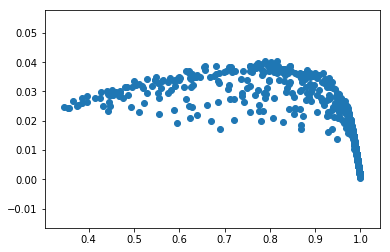

In [16]:
    

selectionX=['Cs137A','Cs134A','Eu154A','tau','cherenkov']
#selectionIso=[iso for iso in selectionX if iso is not 'tau']
#selectionIso=['Cs137A','Cs134A','Eu154A','Zr95A','Nb95A','Ru106A','Ce141A','Ce144A']
selectionIso=['Cs137A','Cs134A','Eu154A']

traindf[selectionIso]=traindf[selectionIso].apply(lambda row: row/sum(row.values), axis=1)
plt.scatter(traindf['Cs137A'], traindf['Eu154A'], cmap='Greens')

Xtrain=traindf.loc[:,selectionX]
ss = StandardScaler()
Xtrainf=ss.fit_transform(Xtrain)

testdf[selectionIso]=testdf[selectionIso].apply(lambda row: row/sum(row.values), axis=1)
Xtest=testdf.loc[:,selectionX]
Xtest=ss.transform(Xtest)

YBUtrain=traindf.loc[:,['BU']]
YCTtrain=traindf.loc[:,['CT']]
YIEtrain=traindf.loc[:,['IE']]
YBUtest=testdf.loc[:,['BU']]
YCTtest=testdf.loc[:,['CT']]
YIEtest=testdf.loc[:,['IE']]

#plt.figure()
#plt.plot(labelsBU,dataBICSelect[:,1],'o')
#plt.show()
#Xnorm=np.empty((0,len(locs)))
#for row in dataBICSelect:
#    if selection[-1]=='kinf':
#        Xnorm=np.vstack([Xnorm,np.append(row[:-1]/sum(row[:-1]),row[-1])])
#    else:
#        Xnorm=np.vstack([Xnorm,row/sum(row)])
#    #Xnorm=np.vstack([Xnorm,np.append(row[:-1],row[-1])])
#    #Xnorm=np.vstack([Xnorm,np.append(row[:-1],row[-1])])
#
#plt.figure()
#plt.scatter(YCTtrain,Xtrainf[:,1])
#plt.colorbar()
#plt.show()  

C:\Users\eribr459\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
C:\Users\eribr459\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Users\eribr459\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


BU test and train mse
4.19662767545608
2.717057254712593
CT test and train mse
350.201303690653
267.7389629605345
IE test and train mse
0.04623355046604235
0.03146354118681259


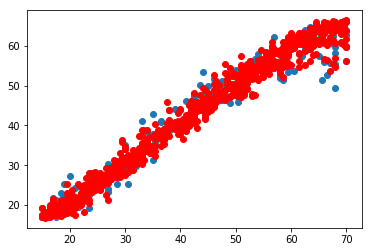

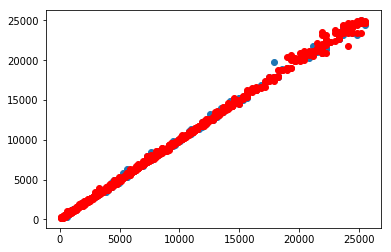

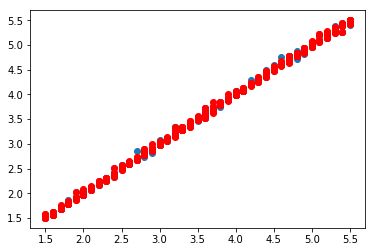

In [17]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


rfrbu = RandomForestRegressor(n_estimators=10,max_depth=16,random_state=0,min_samples_leaf=5)
rfrct = RandomForestRegressor(n_estimators=10,max_depth=16,random_state=0,min_samples_leaf=5)
rfrie = RandomForestRegressor(n_estimators=10,max_depth=16,random_state=0,min_samples_leaf=5)

rfrbu.fit(Xtrainf, YBUtrain)
rfrct.fit(Xtrainf, YCTtrain)
rfrie.fit(Xtrainf, YIEtrain)

YBUpred = rfrbu.predict(Xtest)
YBUpredtrain = rfrbu.predict(Xtrainf)

YCTpred = rfrct.predict(Xtest)
YCTpredtrain = rfrct.predict(Xtrainf)

YIEpred = rfrie.predict(Xtest)
YIEpredtrain = rfrie.predict(Xtrainf)

plt.figure()
plt.plot(YBUtest,YBUpred,'o',YBUtrain,YBUpredtrain,'ro')
print('BU test and train mse')
print(np.sqrt(mean_squared_error(YBUtest,YBUpred)))
print(np.sqrt(mean_squared_error(YBUtrain,YBUpredtrain)))

plt.figure()
plt.plot(YCTtest,YCTpred,'o',YCTtrain,YCTpredtrain,'ro')
print('CT test and train mse')
print(np.sqrt(mean_squared_error(YCTtest,YCTpred)))
print(np.sqrt(mean_squared_error(YCTtrain,YCTpredtrain)))

plt.figure()
plt.plot(YIEtest,YIEpred,'o',YIEtrain,YIEpredtrain,'ro')
print('IE test and train mse')
print(np.sqrt(mean_squared_error(YIEtest,YIEpred)))
print(np.sqrt(mean_squared_error(YIEtrain,YIEpredtrain)))
